In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.pyplot import MultipleLocator

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

In [34]:
def paramDis_pnorm(s, sre, p):
    maps = lambda k : s[k] if k in s else 0.0
    mapfs = lambda k : sre[k] if k in sre else 0.0
    allKeys = set(s.keys()).union(sre.keys())
    ans = 0.0
    idea = 0.0
    for k in allKeys:
        ans += abs(maps(k) - mapfs(k))**p
        idea += abs(maps(k))**p
    return ans / idea

def getAllError_calls_multiH(filename):
    calls = []
    errors = []
    with open(filename) as f:
        data = json.load(f)
    for case in data:
        if type(case) == dict:
            originalHam = case
        else :
            calls.append(case[1] + case[2])
            errors.append(paramDis_pnorm(originalHam, case[0], 1))
    return errors, calls

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels, fontsize=38)
    ax.set_xlim(0.6, len(labels) + 0.4)
    ax.set_xlabel('numbers of bins', size=38)

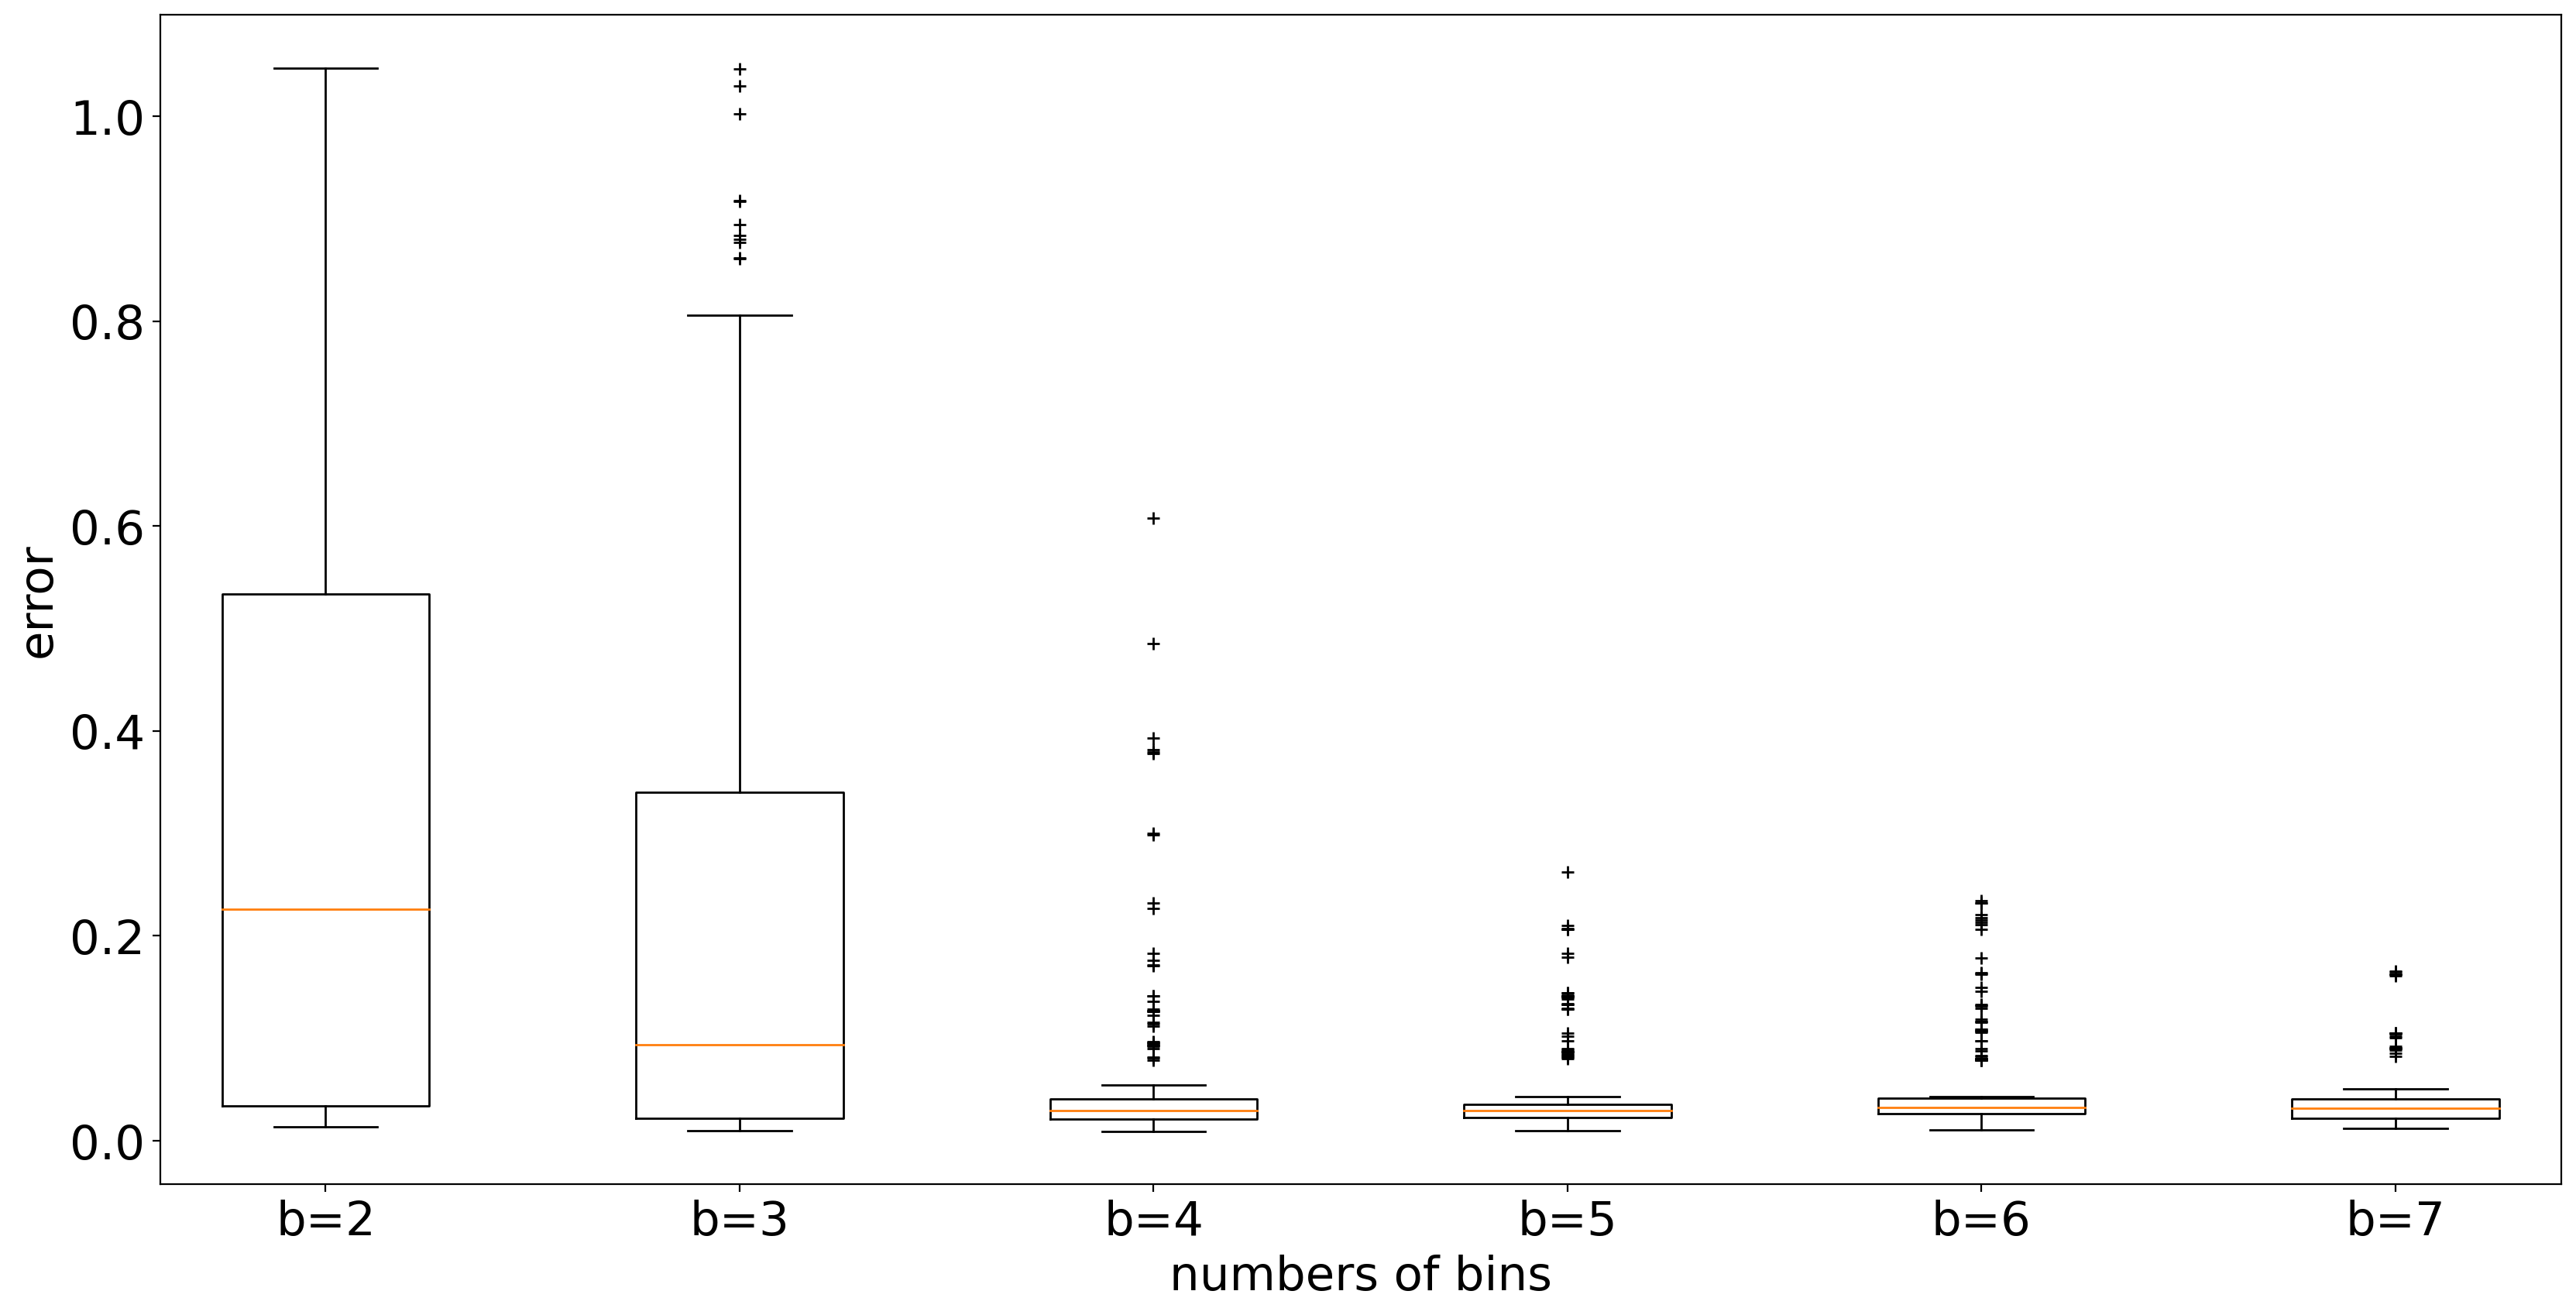

In [8]:
# useful example https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html

bs = ["2",
       "3",
       "4",
       "5",
       "6",
       "7"
     ]

filenames = ["../data/strictlyRandomIsingRounds=500_b=" + x + ".json" for x in bs]
titles = [ "b=" + x for x in bs]

plotNum = 200

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(random.sample(e, plotNum))
    calls.append(random.sample(c, plotNum))

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), sharey=True, dpi=200)
bp = ax1.boxplot(errors)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

set_axis_style(ax1, titles)
ax1.set_ylabel("error", size=22)
ax1.tick_params(axis='y', labelsize=22)
plt.savefig("Ising_n=4_varb_boxplot.png", format="png")
plt.show()

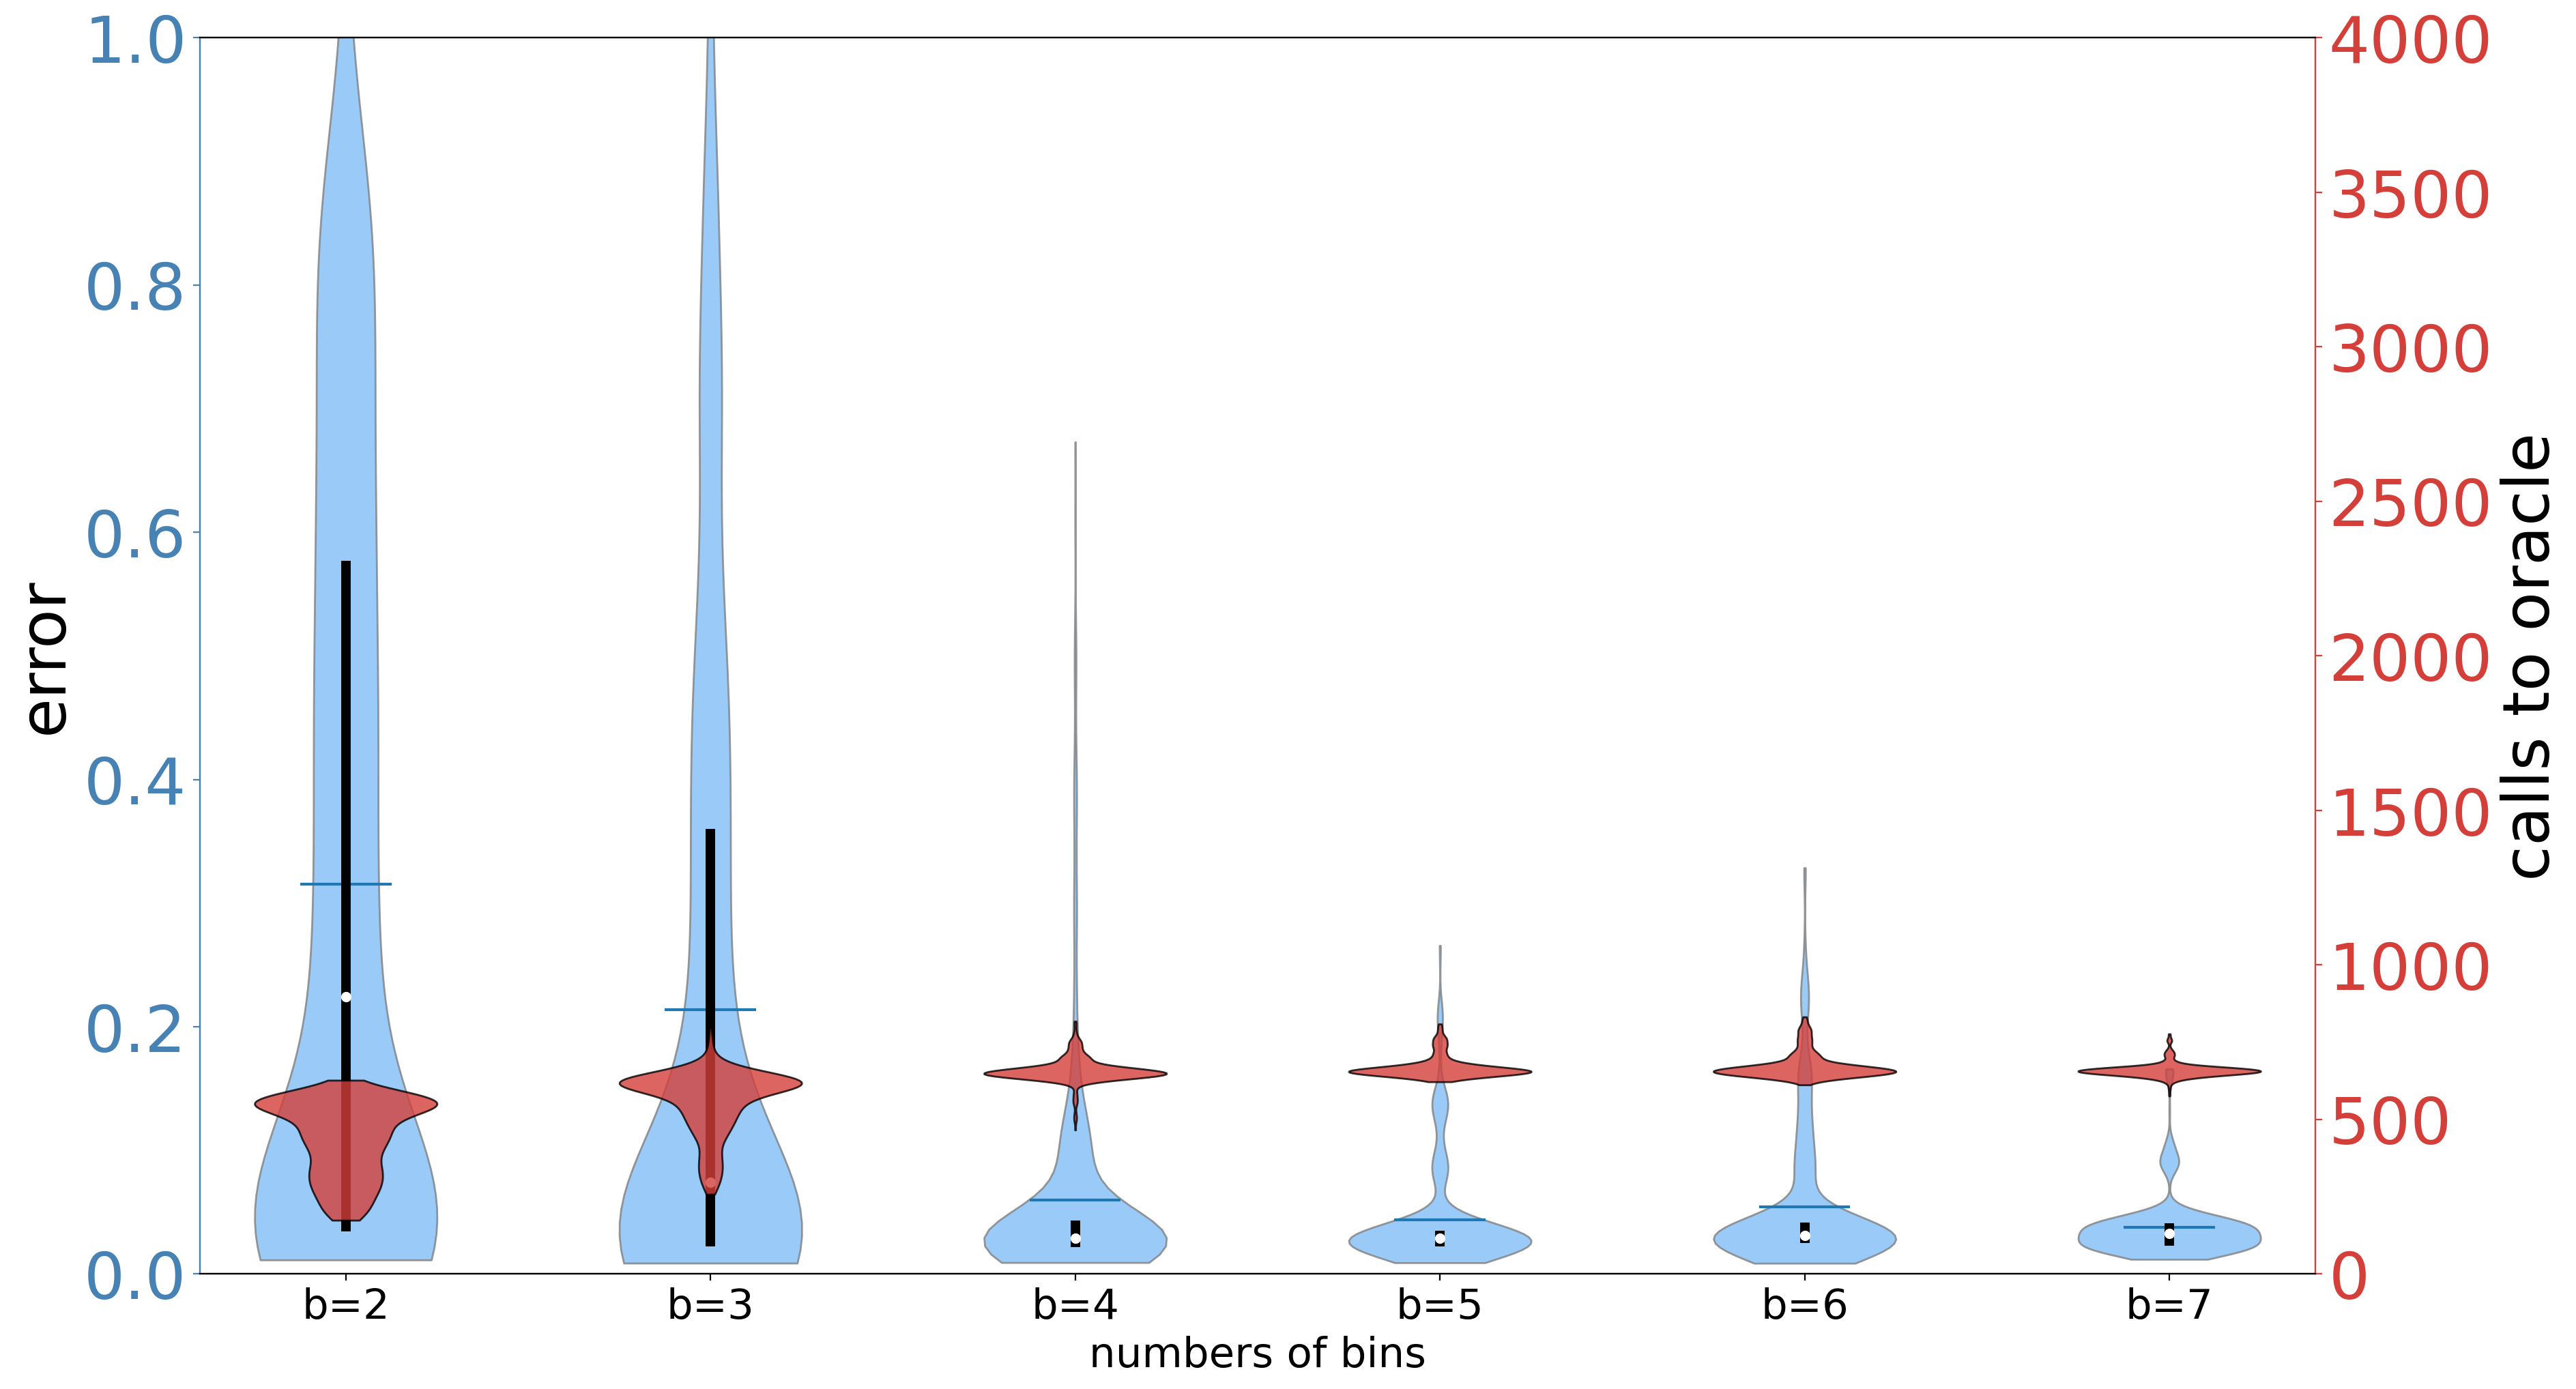

In [9]:
noiseLevels = ["2",
               "3",
               "4",
               "5",
               "6",
               "7"
              ]

filenames = ["../data/strictlyRandomIsingRounds=500_b=" + x + ".json" for x in noiseLevels]
titles = [ "b=" + x for x in noiseLevels]

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(e)
    calls.append(c)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 12), sharey=True, dpi=200)
set_axis_style(ax1, titles)
quartile1, medians, quartile3= [], [], []
for e in errors:
    q1, m, q3 = np.percentile(e, [25, 50, 75], axis=0)
#     print(q1, m, q3)
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)

    
ax2 = ax1.twinx()
ax2.set_ylabel("calls to oracle", fontsize=34)
    
ax1.tick_params(axis='y', colors='steelblue')
ax1.spines['left'].set_color('steelblue')
ax2.spines['left'].set_color('steelblue')

ax1.spines['right'].set_color('#D43F3A')
ax2.spines['right'].set_color('#D43F3A')
ax2.tick_params(axis='y', colors='#D43F3A')

# print(quartile1, quartile3, medians)
parts1=ax1.violinplot(errors, showmeans=True, showmedians=False,
        showextrema=False)
inds = np.arange(1, len(medians) + 1)
ax1.set_ylabel("error", size=34)
ax1.scatter(inds, medians, marker='o', color='white', s=20, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)

for pc in parts1['bodies']:
    pc.set_facecolor('#81BEF7')
    pc.set_edgecolor('gray')
    pc.set_alpha(0.8)

# ax2.scatter([1, 2], [1000, 1500], color="red")
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
parts = ax2.violinplot(calls, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_ylim([0, 4000])
ax1.set_ylim([0, 1])
ax1.tick_params(axis='y', labelsize=34)
ax2.tick_params(axis='y', labelsize=34)
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.savefig("Ising_n=4_varb_violin.png", format="png")
plt.show()

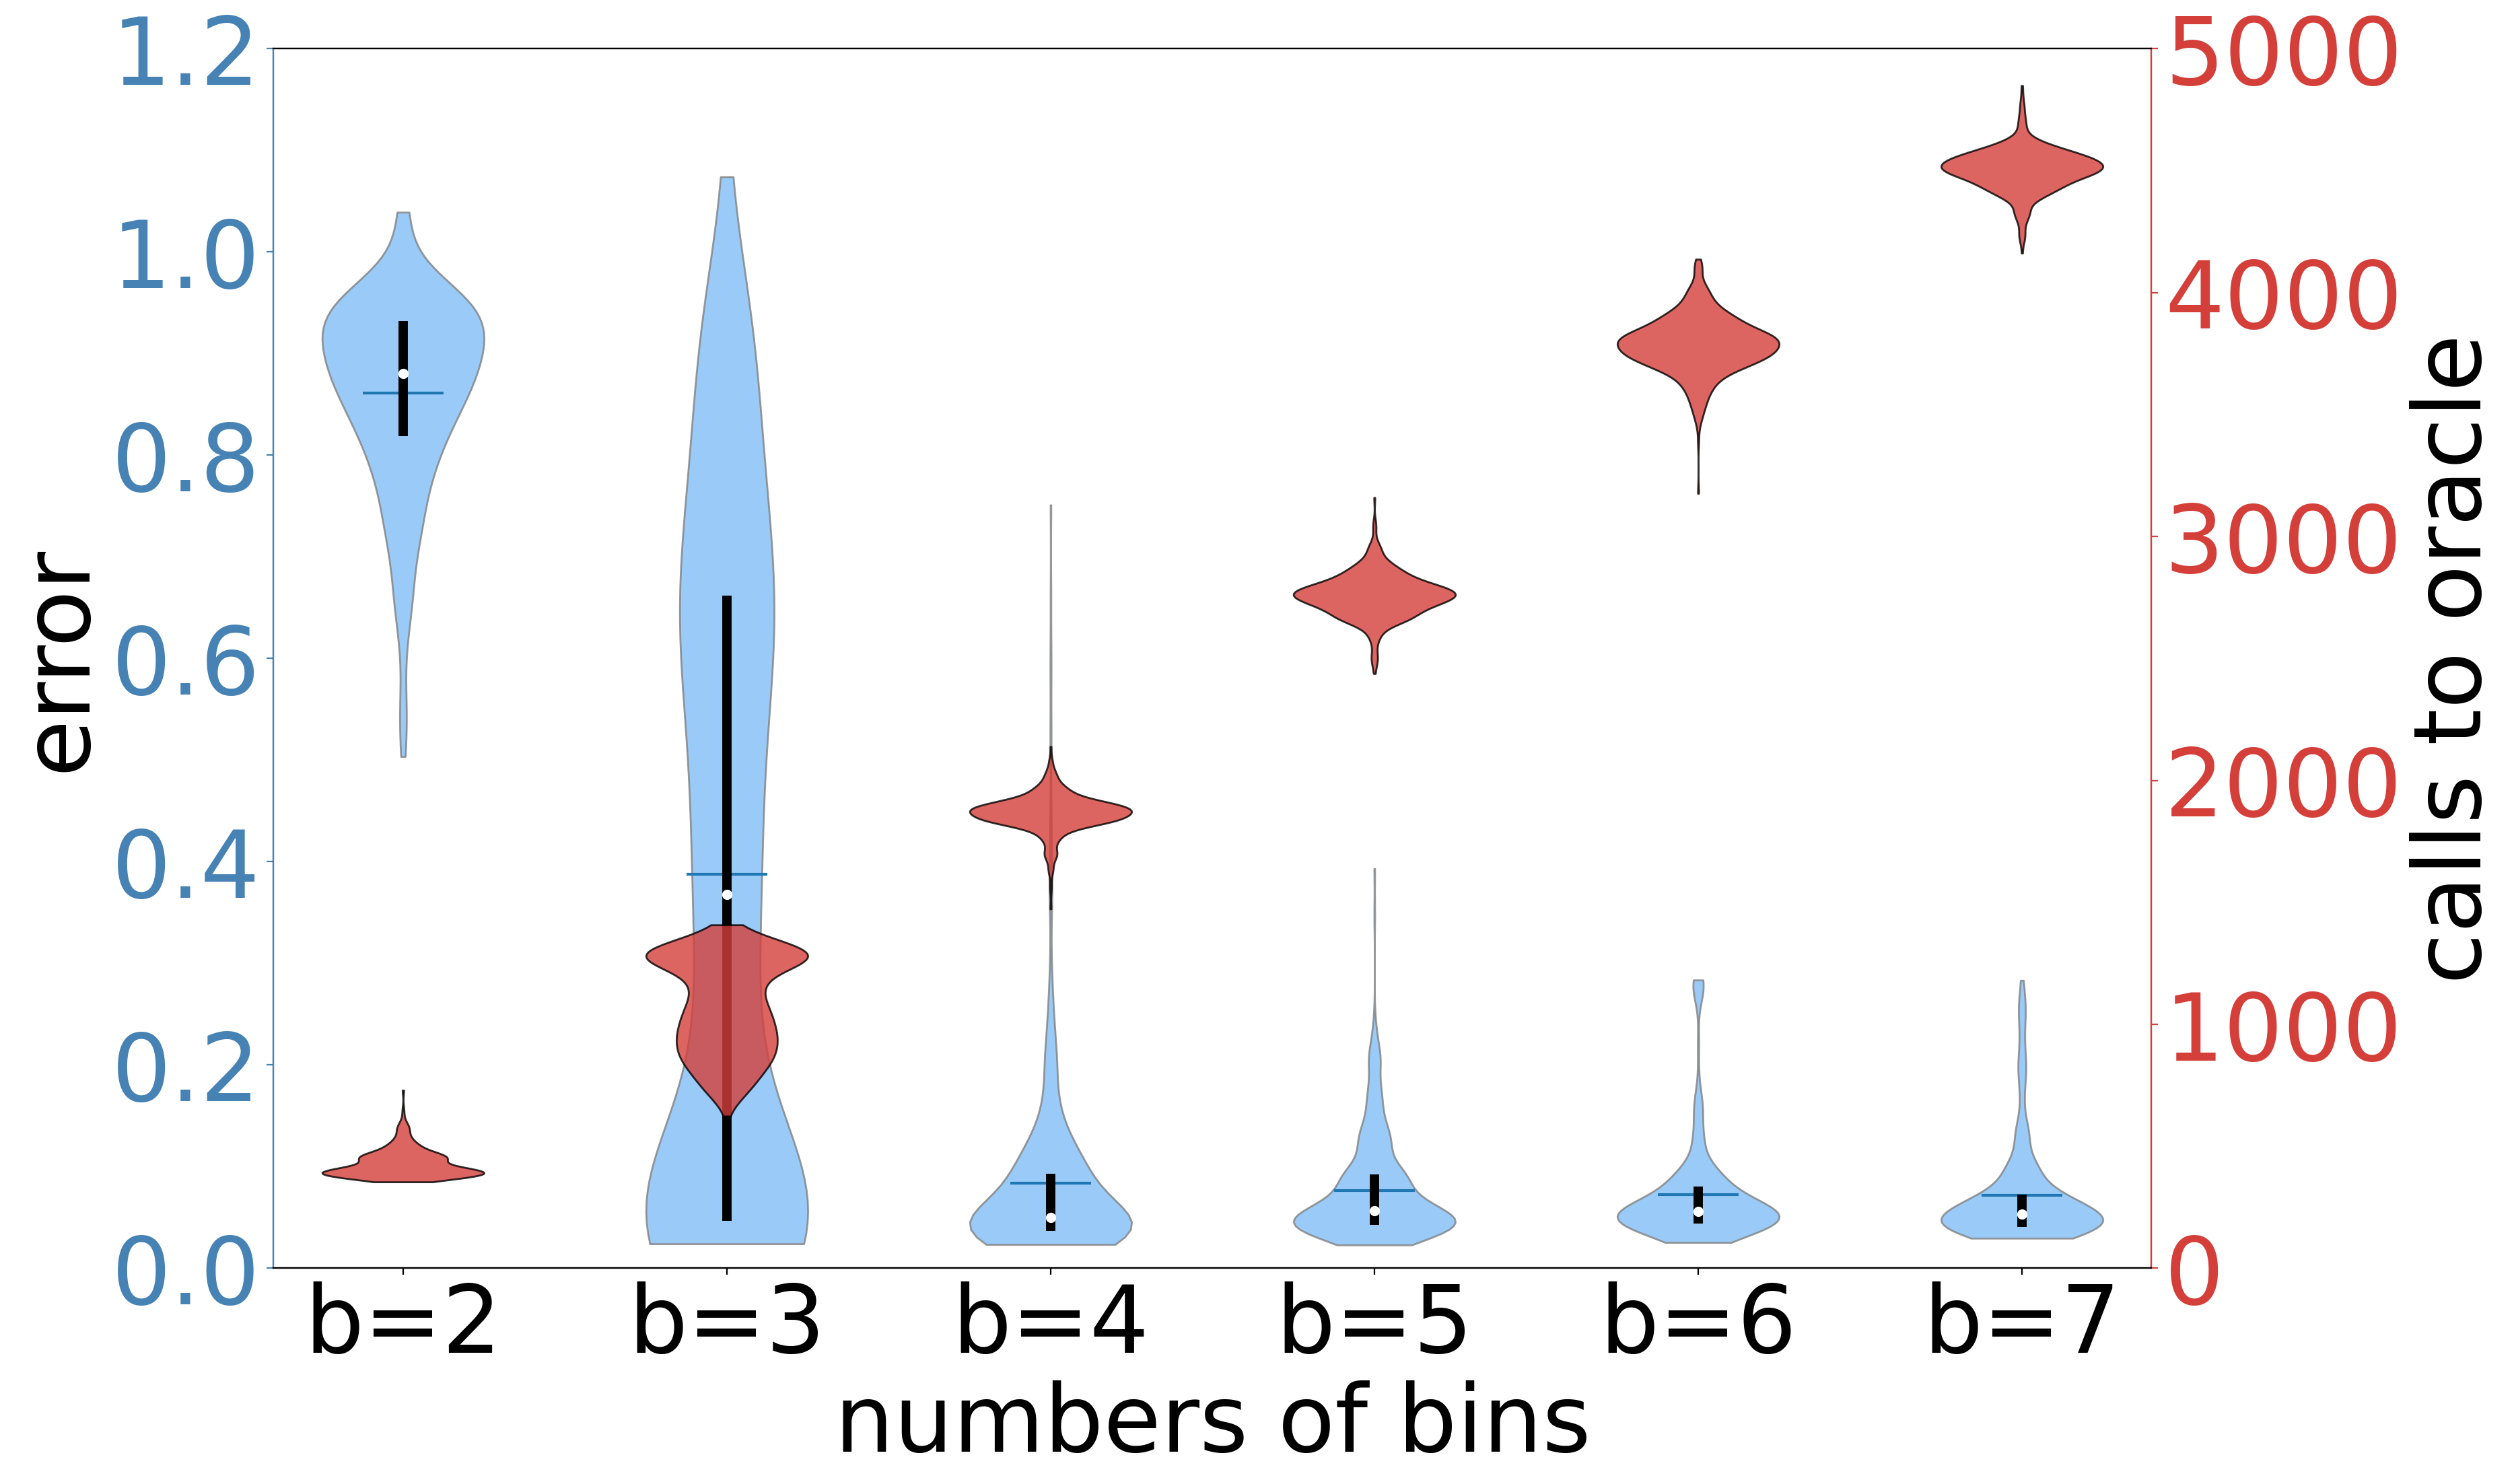

In [32]:
noiseLevels = ["2",
               "3",
               "4",
               "5",
               "6",
               "7"
              ]

filenames = ["../data/strictly6RandomIsingRounds=500_b=" + x + ".json" for x in noiseLevels]
titles = [ "b=" + x for x in noiseLevels]

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(e)
    calls.append(c)

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(18, 12), sharey=True, dpi=200)
set_axis_style(ax1, titles)
quartile1, medians, quartile3= [], [], []
for e in errors:
    q1, m, q3 = np.percentile(e, [25, 50, 75], axis=0)
#     print(q1, m, q3)
    quartile1.append(q1)
    medians.append(m)
    quartile3.append(q3)

    
ax2 = ax1.twinx()
ax2.set_ylabel("calls to oracle", fontsize=50)
    
ax1.tick_params(axis='y', colors='steelblue')
ax1.spines['left'].set_color('steelblue')
ax2.spines['left'].set_color('steelblue')

ax1.spines['right'].set_color('#D43F3A')
ax2.spines['right'].set_color('#D43F3A')
ax2.tick_params(axis='y', colors='#D43F3A')

# print(quartile1, quartile3, medians)
parts1=ax1.violinplot(errors, showmeans=True, showmedians=False,
        showextrema=False)
inds = np.arange(1, len(medians) + 1)
ax1.set_ylabel("error", size=50)
ax1.scatter(inds, medians, marker='o', color='white', s=20, zorder=3)
ax1.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)

for pc in parts1['bodies']:
    pc.set_facecolor('#81BEF7')
    pc.set_edgecolor('gray')
    pc.set_alpha(0.8)

# ax2.scatter([1, 2], [1000, 1500], color="red")
# ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
parts = ax2.violinplot(calls, showmeans=False, showmedians=False,
        showextrema=False)
ax2.set_ylim([0, 5000])
ax1.set_ylim([0, 1.2])
ax1.tick_params(axis='y', labelsize=50)
ax2.tick_params(axis='y', labelsize=50)
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.8)
plt.savefig("Ising_n=6_varb_violin.png", format="png")
plt.show()

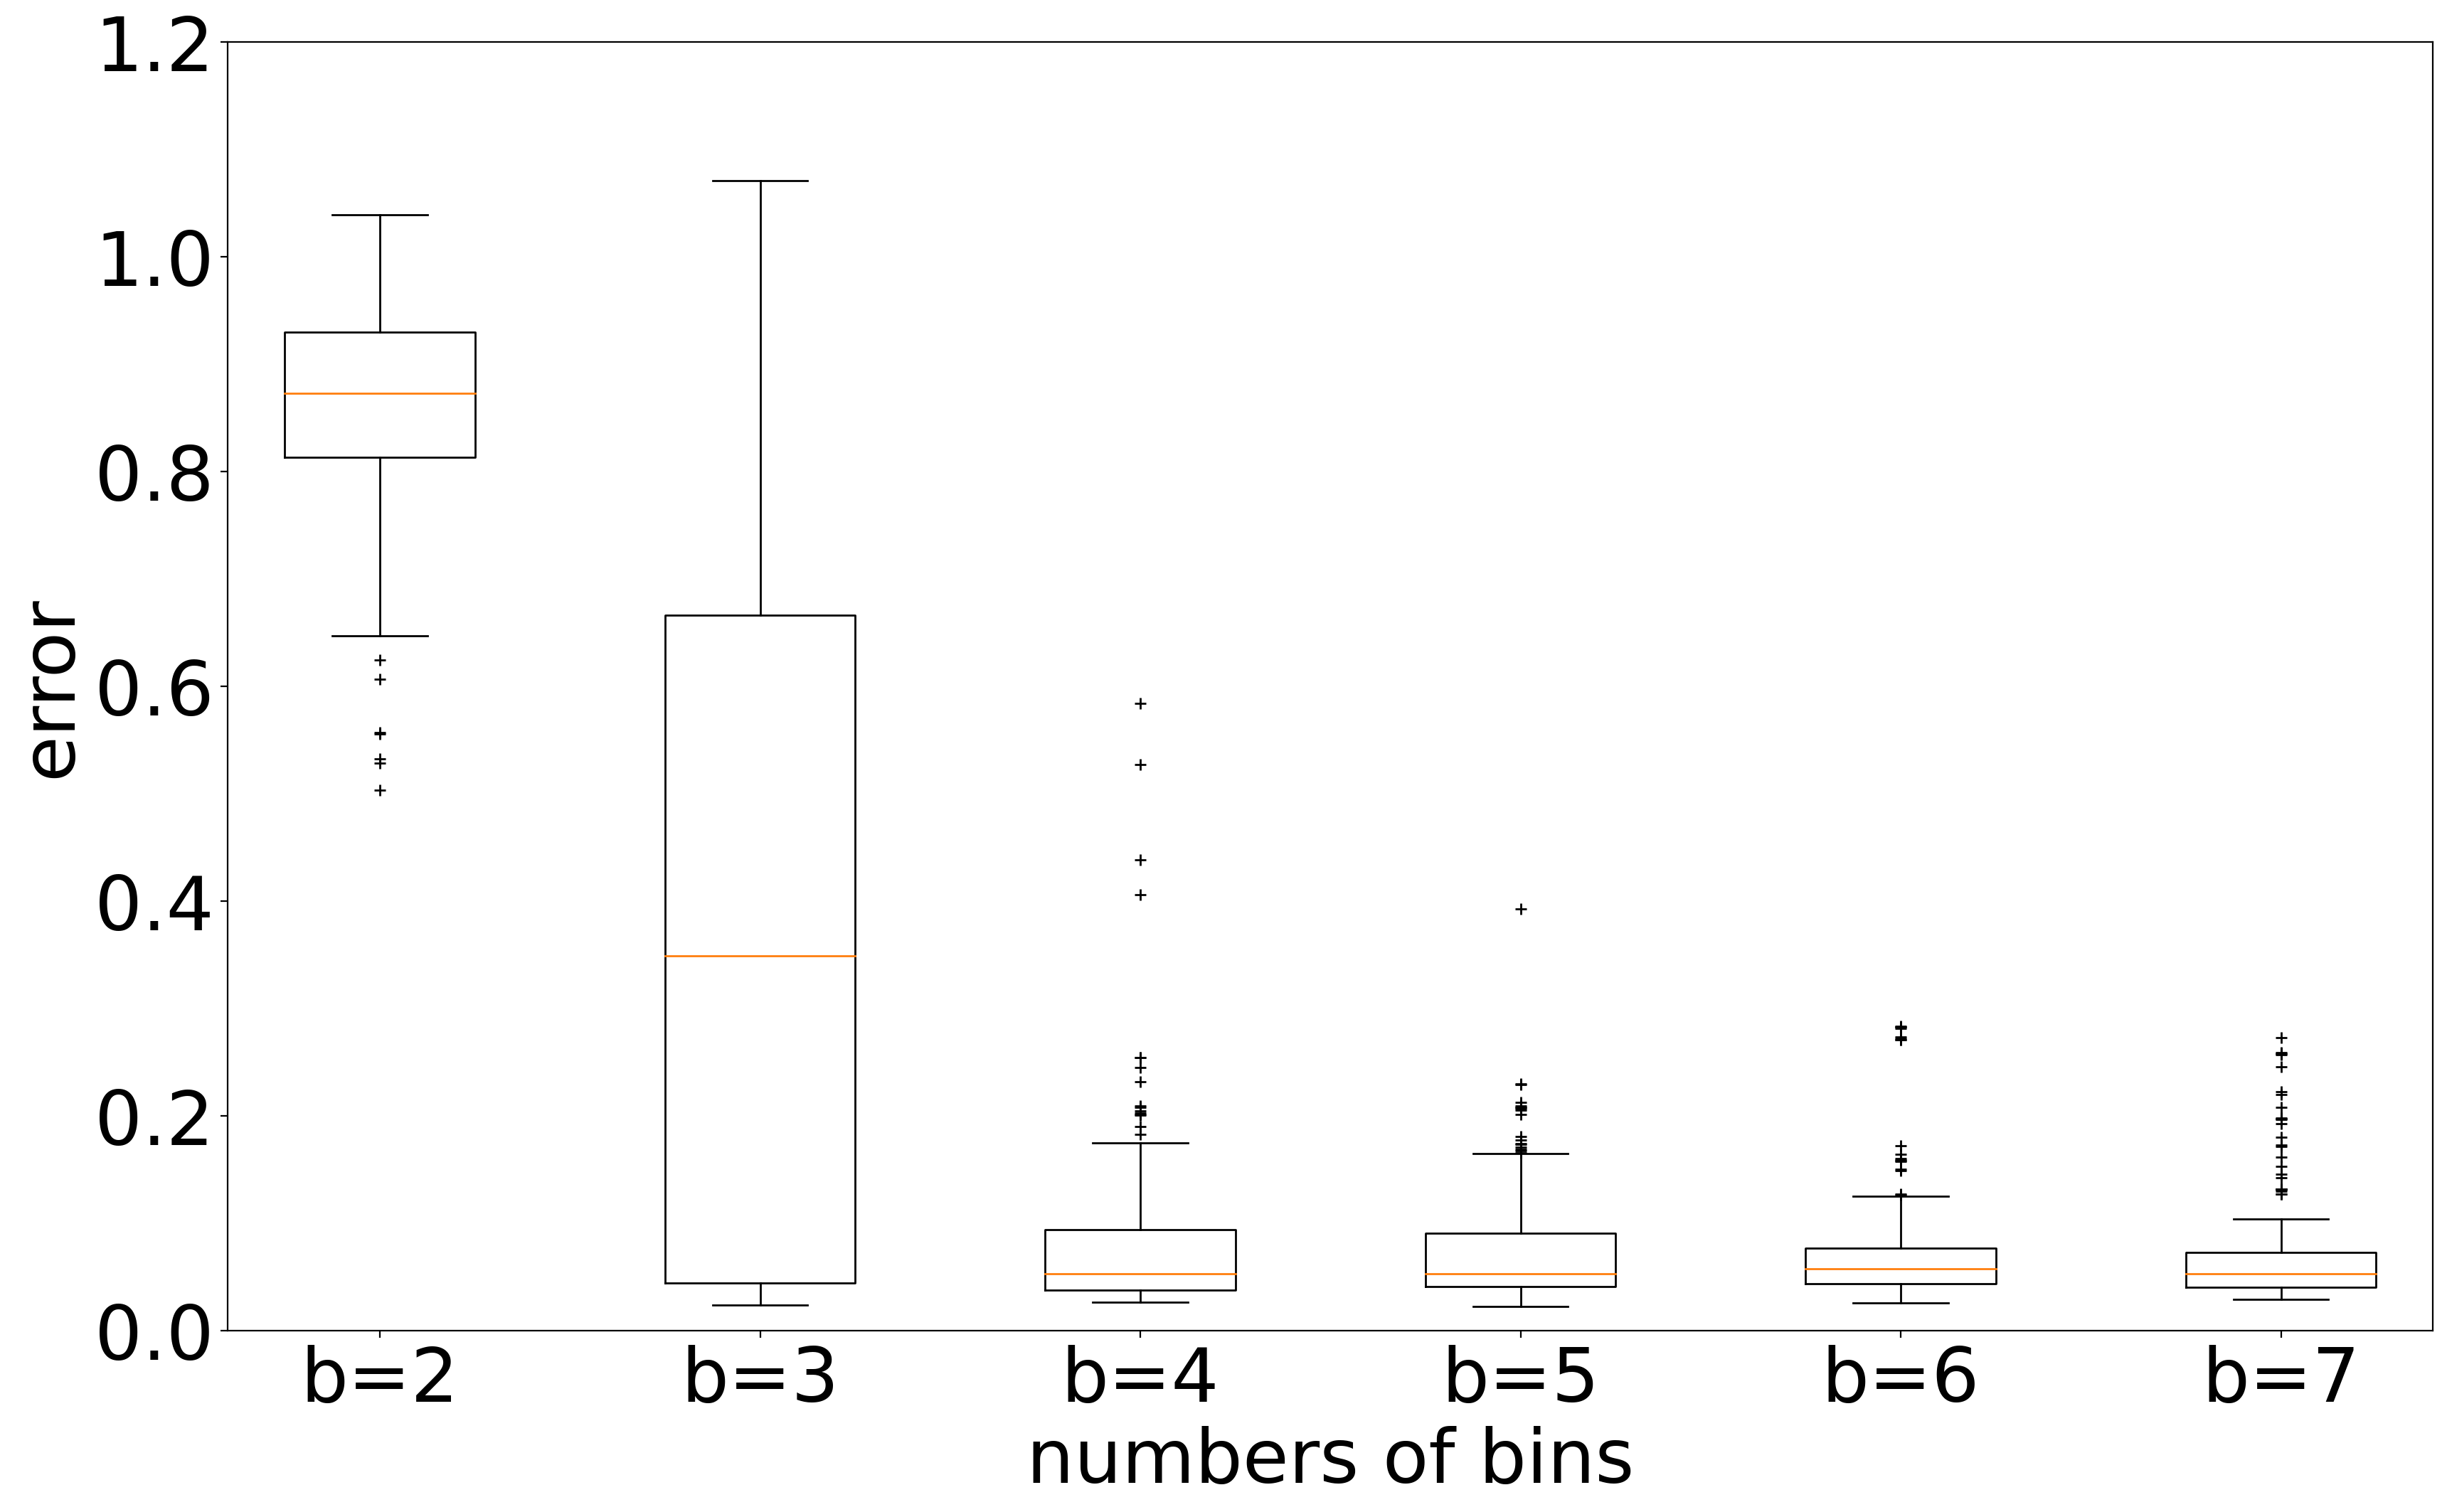

In [36]:
# useful example https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html

bs = ["2",
       "3",
       "4",
       "5",
       "6",
       "7"
     ]

filenames = ["../data/strictly6RandomIsingRounds=500_b=" + x + ".json" for x in bs]
titles = [ "b=" + x for x in bs]

plotNum = 200

errors, calls = [], []
for filename in filenames:
    e, c = getAllError_calls_multiH(filename)
    errors.append(random.sample(e, plotNum))
    calls.append(random.sample(c, plotNum))

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 12), sharey=True, dpi=200)
bp = ax1.boxplot(errors)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')
ax1.set_ylim([0, 1.2])
set_axis_style(ax1, titles)
ax1.set_ylabel("error", size=38)
ax1.tick_params(axis='y', labelsize=38)
plt.savefig("Ising_n=6_varb_boxplot.png", format="png")
plt.show()